In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

raw780 = pd.read_csv('raw780.csv').iloc[:,1:]
raw850 = pd.read_csv('raw850.csv').iloc[:,1:]
chrej = pd.read_csv('chrej.csv')['0'].tolist()


In [3]:
def bychannel2(data1, data2, ch_Rej, sampling):
    data1 = data1.to_numpy()[:,::sampling]
    data2 = data2.to_numpy()[:,::sampling]

    fig, axs = plt.subplots(3,6, figsize=(24, 8), facecolor=None)#'white', edgecolor=None)
    fig.subplots_adjust(hspace=0.1)#, wspace=0.01)

    colorlist = ['gold','yellowgreen','slateblue','magenta'] #4 이상의 마커는 3으로 바뀌므로 4개만
    linestylelist = ['-',':',':',':',':']
    cols = [2,4,6,8, 1,3,5,7,9, 0,2,4,6,8,10]
    plts = [3,6,9,12, 2,5,8,11,14, 1,4,7,10,13,15]
    col = 0
    for r in range(3):
        for _ in range(6):
            if ch_Rej[col]==True:
                ls = '--'
                colors = ['royalblue','darkred']
            else:
                ls = '-'
                colors = ['cadetblue', 'lightcoral']

            axs[r][_].plot(data1[plts[col]-1], color=colors[0], linestyle=ls)
            axs[r][_].plot(data2[plts[col]-1], color=colors[1], linestyle=ls)
            axs[r][_].set_title(f'Channel {plts[col]}', color='cadetblue', fontsize=6)
            axs[r][_].set_frame_on(False)
            axs[r][_].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
            axs[r][_].tick_params(axis = "y", direction='in', pad=0.1, labelsize=6, labelcolor='white',\
                gridOn=True, grid_color = 'white', grid_alpha = 0.5, grid_linestyle = '--',\
                grid_linewidth=0.5)

            axs[r][_].set_facecolor('white')


            if (cols[col]+2)>=10 and col<13:
                col += 1
                break
            col += 1

    axs[0][4].axis('off')
    axs[0][5].axis('off')
    axs[1][5].axis('off')
    
    
    

def indiv(data1, data2, ch_Rej, channelnum, sampling):
    data1 = data1.to_numpy()[::sampling]
    data2 = data2.to_numpy()[::sampling]
    #fig = plt.plot(figsize=(2, .5), facecolor=None)#'white', edgecolor=None)
    #plt.figure(figsize=(20,10), facecolor='aliceblue')
    plt.figure(figsize=(3,1.5), facecolor='aliceblue')
    

    #hfont = {'fontname':'Gill Sans MT Condensed'}
    hfont = {'fontname':'Agency FB'}


    colorlist = ['gold','yellowgreen','slateblue','magenta'] #4 이상의 마커는 3으로 바뀌므로 4개만
    linestylelist = ['-',':',':',':',':']
    if ch_Rej==True:
        ls = 'dotted'
        colors = ['royalblue','darkred']
    else:
        ls = '-'
        colors = ['cadetblue', 'lightcoral']

    plt.plot(data1, color=colors[0], linestyle=ls)
    plt.plot(data2, color=colors[1], linestyle=ls)
    plt.title(f'Channel #{channelnum}', color='cadetblue', **hfont)#, fontsize=6)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis = "y", direction='in', pad=0.1, labelsize=6, labelcolor='gray',\
        gridOn=True, grid_color = 'gray', grid_alpha = 0.5, grid_linestyle = '-',\
        grid_linewidth=0.7)
    plt.yticks(**hfont, fontsize=10)
    plt.box(False)



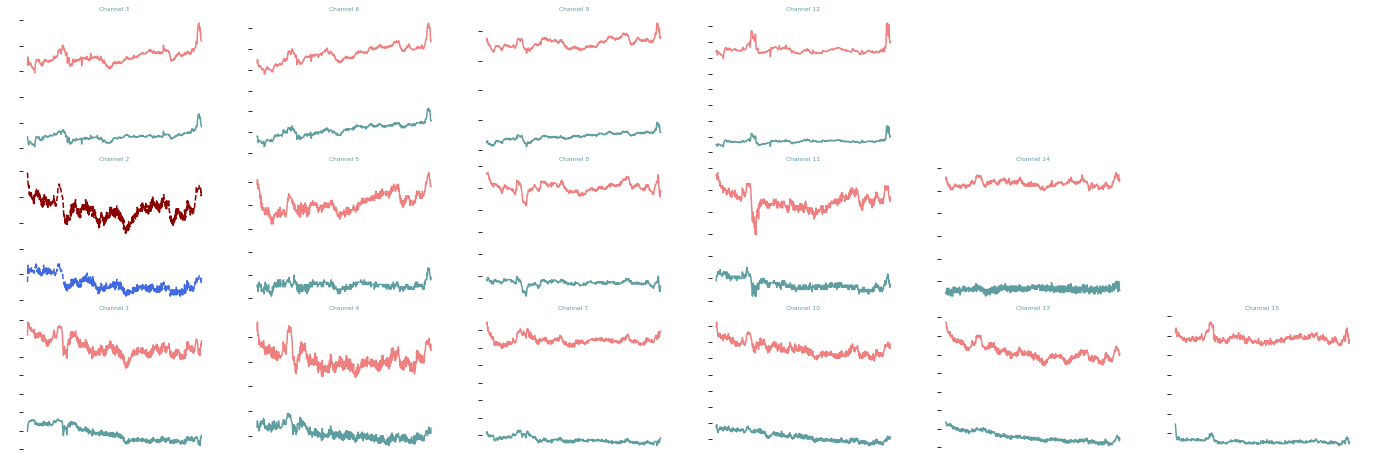

In [34]:
bychannel2(raw780, raw850, chrej, 3)

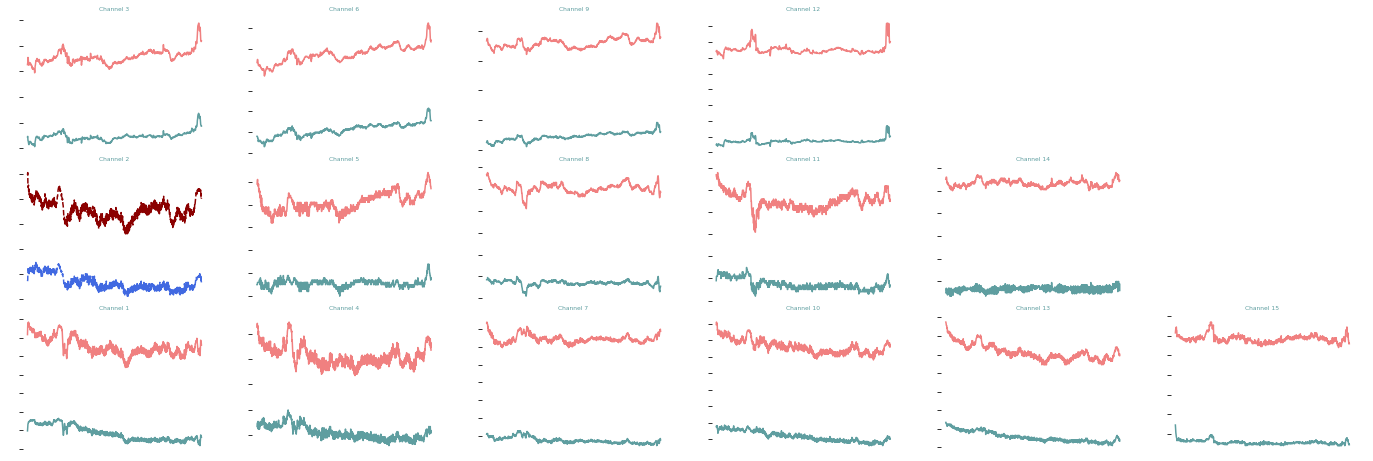

In [20]:
bychannel2(raw780, raw850, chrej, 2)

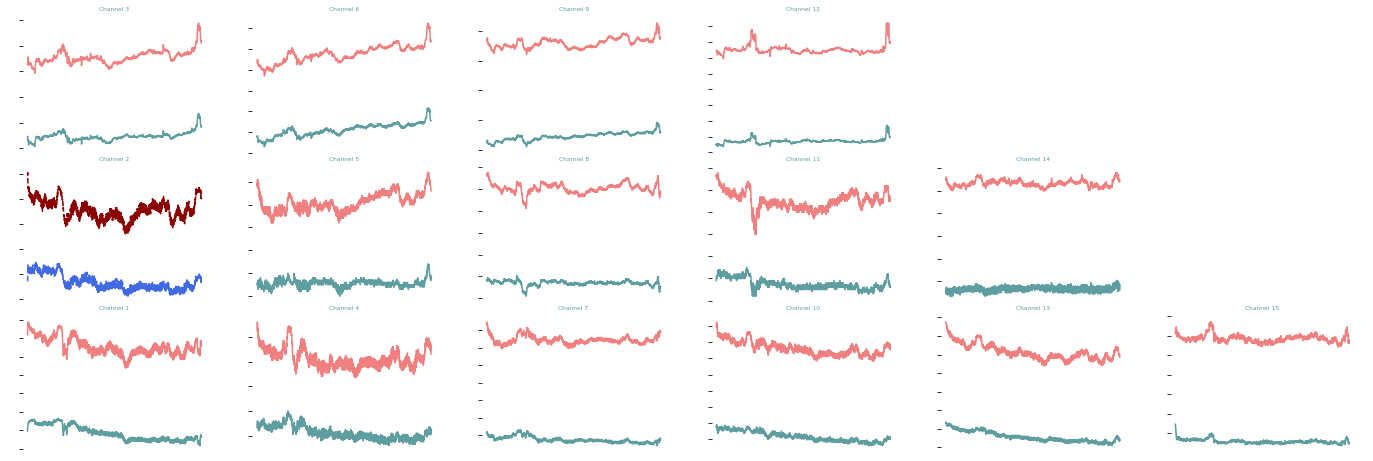

In [21]:
bychannel2(raw780, raw850, chrej, 1)

In [52]:
ch_Rej

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True]

In [50]:
raw780 = pd.read_csv('raw780.csv').iloc[:,1:]
raw850 = pd.read_csv('raw850.csv').iloc[:,1:]
ch_Rej = pd.read_csv('ch_Rej.csv')['0'].tolist()
raw_ch_Rej = pd.read_csv('raw_ch_Rej.csv')['0'].tolist()
raw_hbo = pd.read_csv('raw_hbo.csv').iloc[:,1:]
raw_hbr = pd.read_csv('raw_hbr.csv').iloc[:,1:]
hbo = pd.read_csv('hbo.csv').iloc[:,1:]
hbr = pd.read_csv('hbr.csv').iloc[:,1:]

# for i in range(len(raw780)):
#     indiv(raw780.loc[i], raw850.loc[i], chrej[i], i+1, 1)

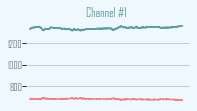

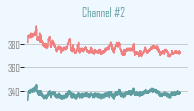

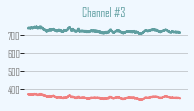

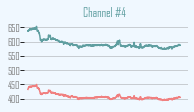

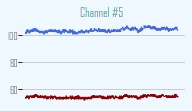

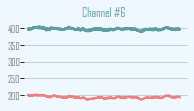

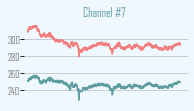

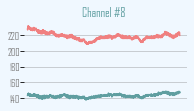

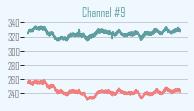

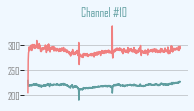

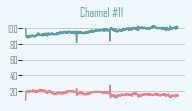

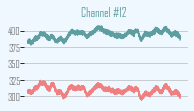

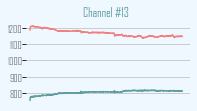

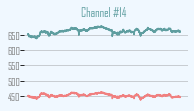

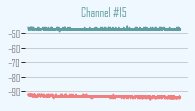

In [6]:
# for i in range(len(raw780)):
#     indiv(hbo.loc[i], hbr.loc[i], ch_Rej[i], i+1, 3)
for i in range(len(raw780)):
    indiv(raw780.loc[i], raw850.loc[i], chrej[i], i+1, 1)

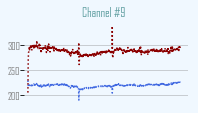

In [98]:
indiv(raw780.loc[9], raw850.loc[9], ch_Rej[9], 9, 1)

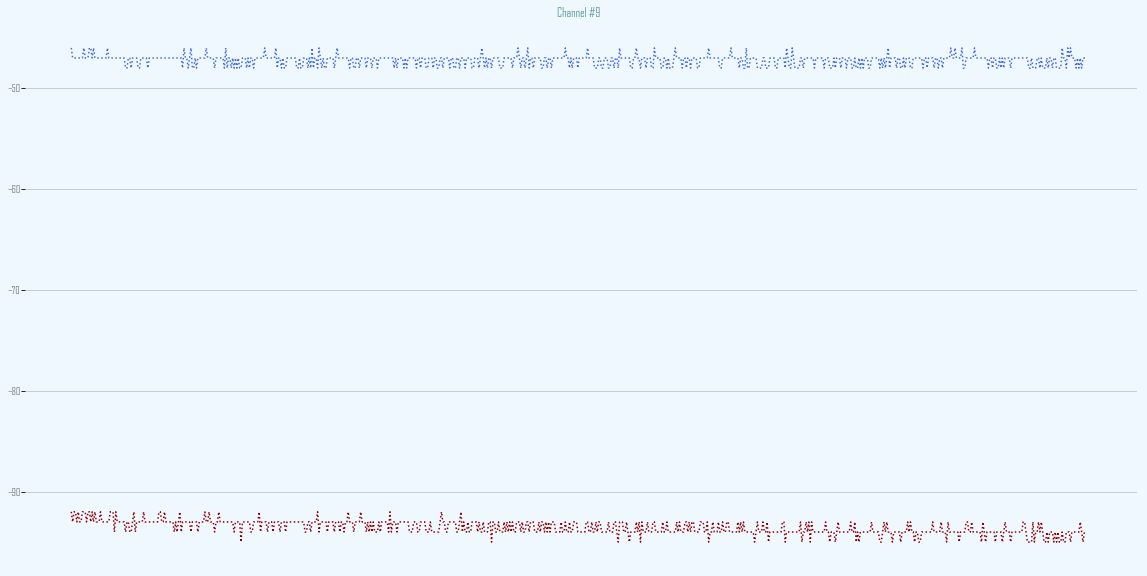

In [83]:
indiv(raw780.loc[14], raw850.loc[14], ch_Rej[14], 9, 2)

#### sampling with 1/3 rate shows visible difference while 1/2 does not